# Load functions and modules

In [14]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt

import hyperspy.api as hs


from hoglundTools._hyperspy import correlate_1D_in_2D
from hoglundTools._hyperspy.components import Gaussian2D

  0%|          | 0/129 [00:00<?, ?it/s]

Shifts (units)
[4.160e+01 4.032e+01 3.906e+01 3.782e+01 3.660e+01 3.540e+01 3.422e+01
 3.306e+01 3.192e+01 3.080e+01 2.970e+01 2.862e+01 2.756e+01 2.652e+01
 2.550e+01 2.450e+01 2.352e+01 2.256e+01 2.162e+01 2.070e+01 1.980e+01
 1.892e+01 1.806e+01 1.722e+01 1.640e+01 1.560e+01 1.482e+01 1.406e+01
 1.332e+01 1.260e+01 1.190e+01 1.122e+01 1.056e+01 9.920e+00 9.300e+00
 8.700e+00 8.120e+00 7.560e+00 7.020e+00 6.500e+00 6.000e+00 5.520e+00
 5.060e+00 4.620e+00 4.200e+00 3.800e+00 3.420e+00 3.060e+00 2.720e+00
 2.400e+00 2.100e+00 1.820e+00 1.560e+00 1.320e+00 1.100e+00 9.000e-01
 7.200e-01 5.600e-01 4.200e-01 3.000e-01 2.000e-01 1.200e-01 6.000e-02
 2.000e-02 0.000e+00 0.000e+00 2.000e-02 6.000e-02 1.200e-01 2.000e-01
 3.000e-01 4.200e-01 5.600e-01 7.200e-01 9.000e-01 1.100e+00 1.320e+00
 1.560e+00 1.820e+00 2.100e+00 2.400e+00 2.720e+00 3.060e+00 3.420e+00
 3.800e+00 4.200e+00 4.620e+00 5.060e+00 5.520e+00 6.000e+00 6.500e+00
 7.020e+00 7.560e+00 8.120e+00 8.700e+00 9.300e+00 9.920e+00 1

  0%|          | 0/129 [00:00<?, ?it/s]

0.0


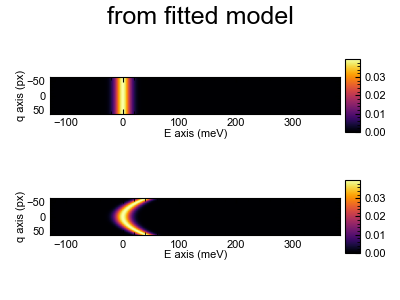

In [50]:
axes = [{'_type': 'UniformDataAxis', 'name': 'q', 'units': 'px',  'navigate': False, 'is_binned': False, 'size': 129, 'scale': 1.0, 'offset': -64.5},
        {'_type': 'UniformDataAxis', 'name': 'E', 'units': 'meV', 'navigate': False, 'is_binned': False, 'size': 1024, 'scale': 0.5, 'offset': -128.}]
s1 = hs.signals.Signal2D(np.zeros((129,1024)), axes=axes)
s2 = hs.signals.Signal2D(np.zeros((129,1024)), axes=axes)

s1 = s1.as_signal1D('E')
s1 = s1.create_model()
g = hs.model.components1D.Gaussian(sigma=10, centre=0.0)
s1.append(g)
s1 = s1.as_signal().as_signal2D(('E','q'))

s2 = s2.as_signal1D('E')
s2 = s2.create_model()
g = hs.model.components1D.Gaussian(sigma=10, centre=0.0)
s2.append(g)

shift = 0.1
shifts_in = ((s2.axes_manager['q'].axis*shift)**2).reshape(g.centre.map['values'].shape).round(2)
shifts_in_px = shifts_in/s1.axes_manager['E'].scale

print(f'Shifts (units)\n{shifts_in}')
# print(f'Shifts  (px)\n{shifts_in_px}')
g.centre.map['values'] = shifts_in
g.centre.map['is_set'] = True

s2 = s2.as_signal().as_signal2D(('E','q'))

fig = plt.figure(figsize=(4,3))
hs.plot.plot_images([s1,s2], per_row=1, fig=fig)
print(cx/s1.axes_manager['E'].scale)

array([83. , 41.5])

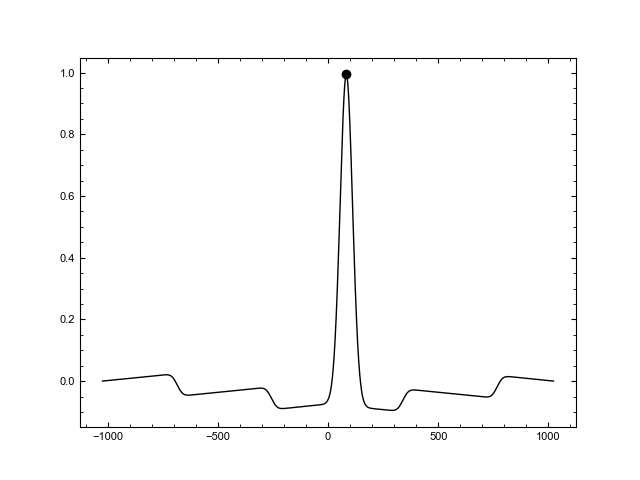

In [52]:
lags, coef = correlate_1D_in_2D(s2.data, s1.data)
px = lags[coef.argmax(1)]
val = [s2.axes_manager['E'].scale*(i) for i in px]

fig,ax = plt.subplots()
ax.plot(lags, coef[0])
ax.scatter(px[0], coef[0].max())

lags.shape
np.stack((px,val), 1)[0]